In [1]:
# importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

# for tree rendering 

import graphviz.backend as be
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

In [2]:
# importing the dataset 

df = pd.read_csv("cars24_train_data.csv")

df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
## droppig the Unnamed column

df.drop('Unnamed: 0',axis=1,inplace=True)

## Explanatory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [5]:
## checking any null or NaN 

df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [6]:
# removing null values from seats column to mode value

df["Seats"].mode()

0    5.0
dtype: float64

In [7]:
df["Seats"].fillna(value=5.0, inplace=True)

In [8]:
# Mileage, Engine, and Power column also have null values but to remove them first we need to convert the datatype of these columns from object to numeric.

#removing kmpl and km/kg from mileage column
df['Mileage'] = df['Mileage'].apply(lambda x: str(x).replace('kmpl', '') if 'kmpl' in str(x) else str(x))
df['Mileage'] = df['Mileage'].apply(lambda x:str(x).replace('km/kg', '') if 'km/kg' in str(x) else str(x))
#removing CC from engine column
df['Engine'] = df['Engine'].apply(lambda x: str(x).replace('CC', '') if 'CC' in str(x) else str(x))
#removing bhp from power column
df['Power'] = df['Power'].apply(lambda x: str(x).replace('bhp', '') if 'bhp' in str(x) else str(x))

In [9]:
# converting to numeric 
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')
df['Engine'] = pd.to_numeric(df['Engine'], errors='coerce')
df['Power'] = pd.to_numeric(df['Power'], errors='coerce')

In [10]:
df['Mileage'].mode()

0    17.0
dtype: float64

In [11]:
df['Mileage'].fillna(value=17.0, inplace=True)

In [12]:
df['Engine'].mode()

0    1197.0
dtype: float64

In [13]:
df['Engine'].fillna(value=1197, inplace=True)

In [14]:
df['Power'].mode()

0    74.0
dtype: float64

In [15]:
df['Power'].fillna(value=74, inplace=True)

## Feature Engineering

In [16]:
# checking unique values in the Name column

df['Name'].nunique()

1876

Creating Brand and Model separetly

In [17]:
df['Brand'] = df['Name'].str.split(' ').str[0]
df.groupby('Brand').nunique()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
Brand,,,,,,,,,,,,,
Ambassador,1,1,1,1,1,1,1,1,1,1,1,0,1
Audi,69,11,12,180,2,1,3,38,11,29,5,19,166
BMW,87,11,14,190,2,1,3,46,9,26,4,30,182
Bentley,1,1,1,1,1,1,1,1,1,1,1,0,1
Chevrolet,43,11,15,107,2,2,3,25,11,25,6,0,80
Datsun,9,7,3,12,1,1,1,5,2,4,2,6,12
Fiat,20,9,11,26,2,1,3,12,5,13,1,1,23
Force,2,2,1,2,1,1,1,1,2,2,1,0,2
Ford,114,11,17,237,2,2,4,40,16,33,3,21,178


In [18]:
df["Brand"].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [19]:
# merging Isuzu and ISUZU

df.Brand[df.Brand=='Isuzu']='ISUZU'

In [20]:
## dropping the Name and new_price column

df = df.drop(["Name", "New_Price"], axis="columns")

In [21]:
df.head(5)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


In [22]:
df.rename(columns={"Kilometers_Driven": "Driven", 
                   "Owner_Type":"Owner",
                   "Fuel_Type":"Fuel"}, inplace=True)

In [23]:
df.isnull().sum()

Location        0
Year            0
Driven          0
Fuel            0
Transmission    0
Owner           0
Mileage         0
Engine          0
Power           0
Seats           0
Price           0
Brand           0
dtype: int64

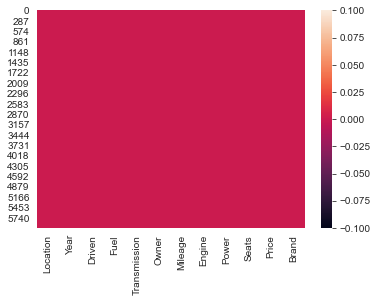

In [24]:
## Checking null values using heatmap
sns.set_style("darkgrid")
sns.heatmap(df.isnull())
plt.show()

No null value in the data frame , it is ready for analysis

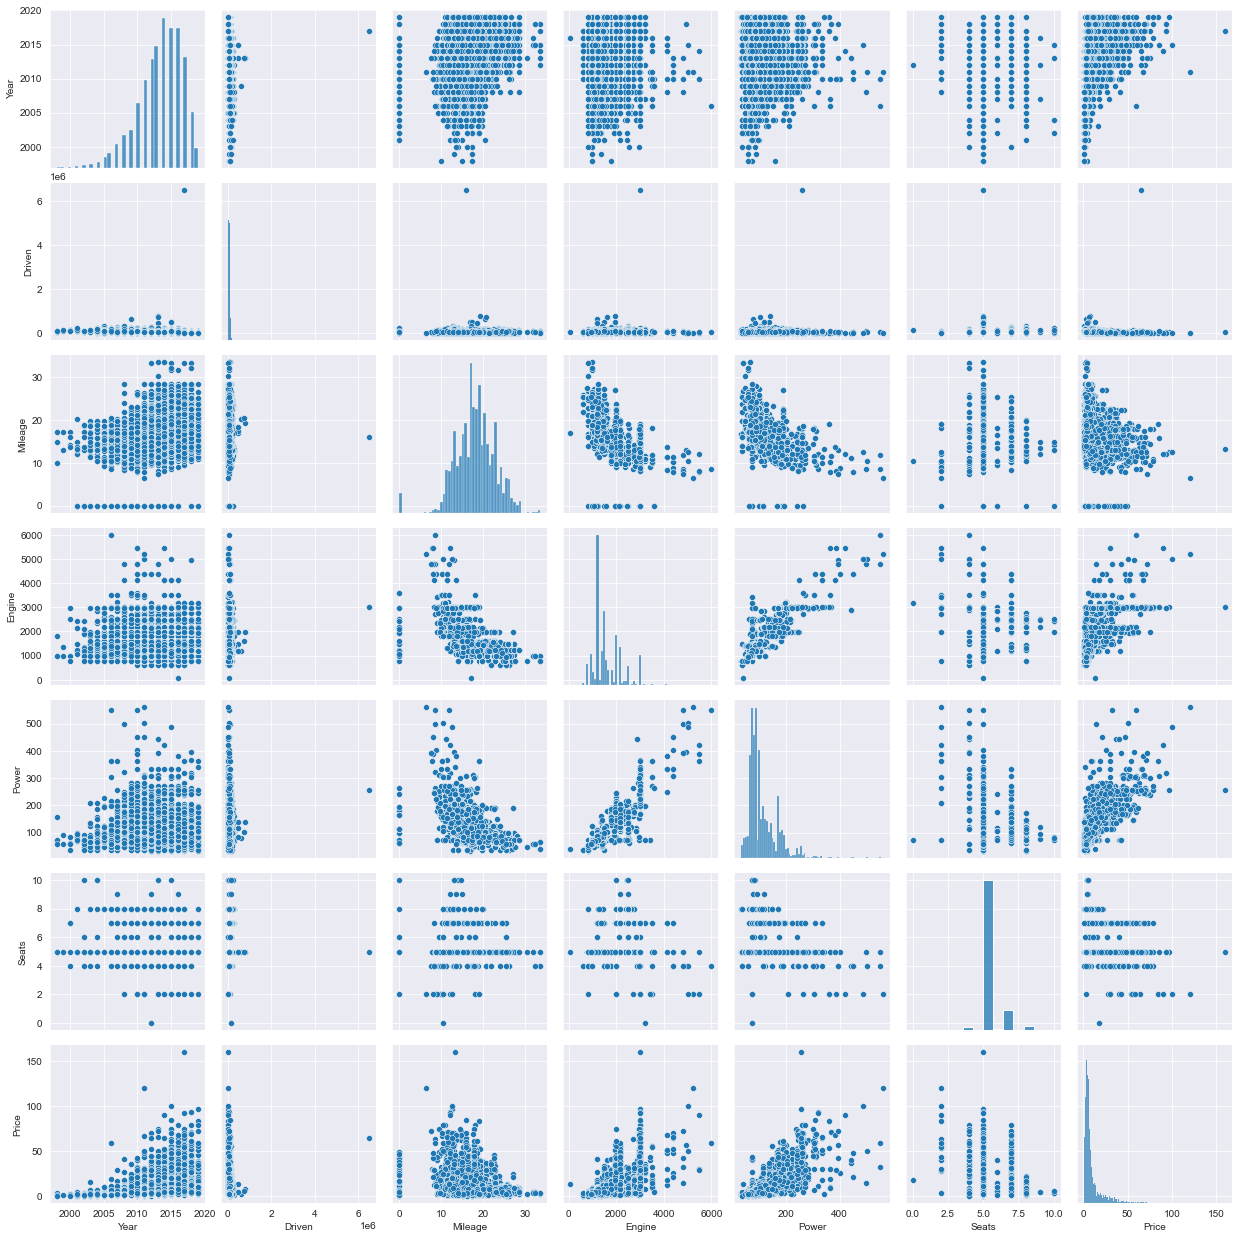

In [25]:
## visualizing multi-dimensional scatter plot using pair plot

sns.set_style("darkgrid")
sns.pairplot(df)
plt.show()

## Data Analysis

### Finding outliers using Boxplot

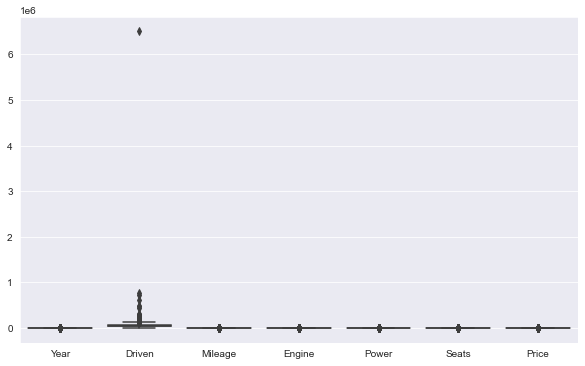

In [26]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.show()

### Univariate Analysis - to check the pattern in dataset and outliers

In [27]:
# sns.set_style('darkgrid')
# plt.figure(figsize=(16,10))
# sns.distplot(df['Driven'])
# plt.ticklabel_format(style='plain', axis='x')
# plt.show()

<span> from boxplot we can see Driven(kms) has outliers</span>

## Dealing with outliers 


In [28]:
# Here, the outliers are situated around the higher prices (right side of the graph)

# This is a dataset about used cars, therefore one can imagine how price above 140000 INR is an excessive price

# Let's declare a variable that will be equal to the 99th percentile of the 'Price' variable

# q = df['Price'].quantile(0.99)
# df = df[df['Price'] < q]

In [29]:
q1 = df['Driven'].quantile(0.25)
q3 = df['Driven'].quantile(0.75)
iqr = q3-q1

UL = q3 + (1.5 * iqr) # Upper Limit
LL = q1 - (1.5 * iqr ) # Lower Limit

print("IQR :", iqr)
print("UL :", UL)
print("LL :", LL)

IQR : 39000.0
UL : 131500.0
LL : -24500.0


In [30]:
df[df['Driven']>UL]

,Location,Year,Driven,Fuel,Transmission,Owner,Mileage,Engine,Power,Seats,Price,Brand
29,Mumbai,2007,262000,Diesel,Manual,Fourth & Above,12.8,2494.0,102.00,7.0,4.00,Toyota
64,Chennai,2016,178000,Diesel,Manual,First,25.0,1396.0,69.00,5.0,2.50,Tata
77,Chennai,2006,230000,Petrol,Manual,Third,12.4,1998.0,132.00,8.0,4.50,Toyota
154,Pune,2012,136997,Diesel,Automatic,First,17.2,1968.0,138.10,5.0,8.50,Skoda
164,Kochi,2014,147898,Diesel,Manual,First,22.7,1498.0,89.84,5.0,4.42,Ford
...,...,...,...,...,...,...,...,...,...,...,...,...
5852,Chennai,2008,192000,Diesel,Manual,First,12.8,2494.0,102.00,8.0,6.85,Toyota
5871,Pune,2009,180000,Diesel,Manual,First,10.9,2499.0,143.00,7.0,7.50,Ford
5914,Hyderabad,2003,132000,Diesel,Manual,First,18.7,1896.0,66.00,5.0,2.25,Skoda
5953,Jaipur,2012,140000,Diesel,Manual,First,20.0,1399.0,68.00,5.0,2.51,Ford


In [31]:
df[df['Driven']> UL].count()['Driven']

202

These 202 values are greater then the upper limit value - 131500.0

In [32]:
## We will remove these values

# outlier removal from Driven

cars = df[df['Driven']<UL]
df = cars
df

,Location,Year,Driven,Fuel,Transmission,Owner,Mileage,Engine,Power,Seats,Price,Brand
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,Maruti
6015,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,Hyundai
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90,Mahindra
6017,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,Maruti


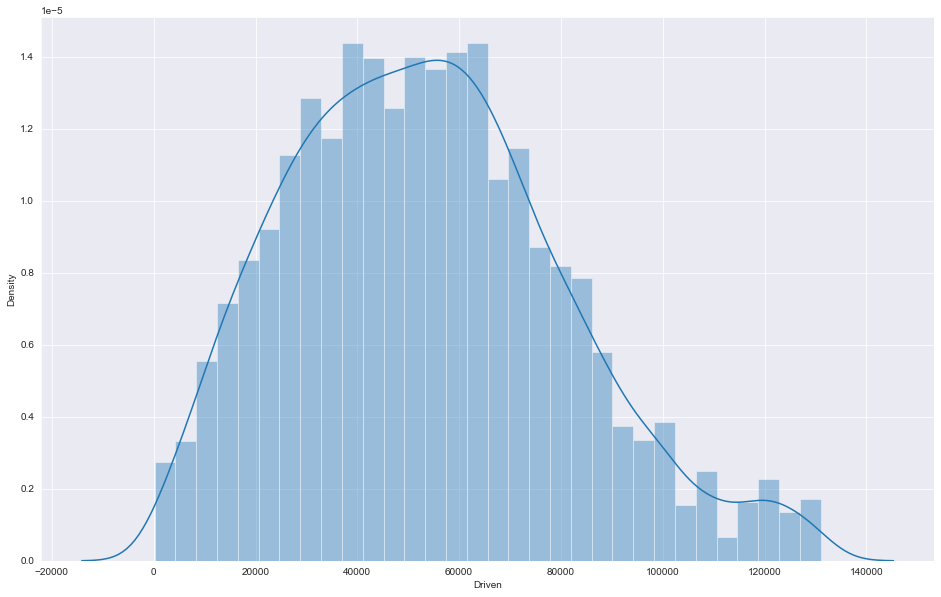

In [33]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,10))
sns.distplot(df['Driven'])
plt.ticklabel_format(style='plain', axis='x')
plt.show()

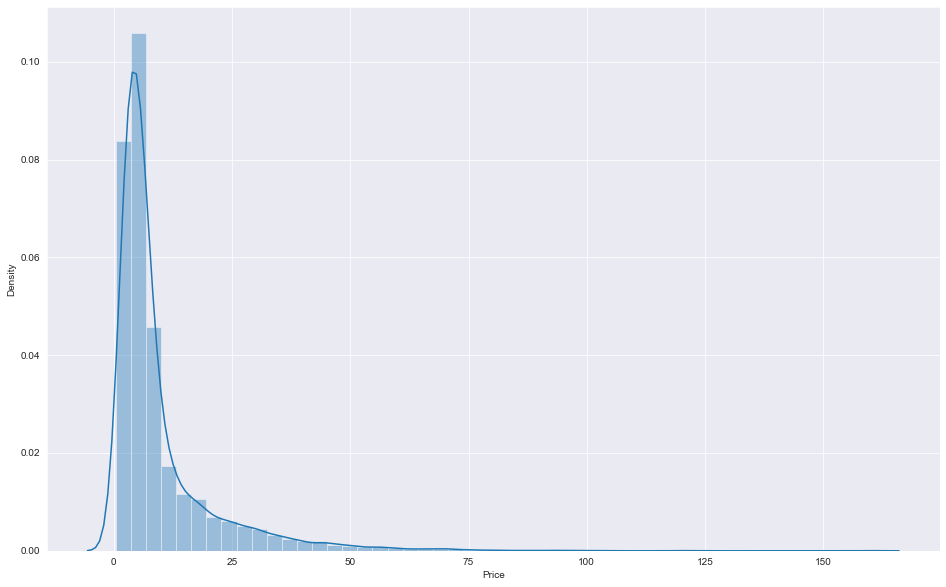

In [34]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,10))
sns.distplot(df['Price'])
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [35]:
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)
iqr = q3-q1

UL = q3 + (1.5 * iqr) # Upper Limit
LL = q1 - (1.5 * iqr ) # Lower Limit

print("IQR :", iqr)
print("UL :", UL)
print("LL :", LL)

IQR : 6.5
UL : 19.75
LL : -6.25


In [36]:
df[df['Price']>UL]

,Location,Year,Driven,Fuel,Transmission,Owner,Mileage,Engine,Power,Seats,Price,Brand
13,Delhi,2014,72000,Diesel,Automatic,First,12.70,2179.0,187.70,5.0,27.00,Land
19,Bangalore,2014,78500,Diesel,Automatic,First,14.84,2143.0,167.62,5.0,28.00,Mercedes-Benz
22,Mumbai,2015,55985,Petrol,Automatic,First,13.53,1984.0,177.01,5.0,23.50,Audi
38,Pune,2013,85000,Diesel,Automatic,First,11.74,2987.0,254.80,5.0,28.00,Mercedes-Benz
50,Kochi,2015,13648,Diesel,Automatic,First,17.11,1968.0,174.33,5.0,21.43,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...
5946,Bangalore,2016,16000,Diesel,Automatic,First,14.69,2993.0,258.00,5.0,48.00,BMW
5950,Bangalore,2014,65630,Diesel,Automatic,First,15.73,1968.0,174.33,5.0,21.75,Audi
5970,Kochi,2018,17773,Petrol,Automatic,First,13.70,1991.0,183.00,5.0,26.76,Mercedes-Benz
5996,Kochi,2016,31150,Diesel,Automatic,First,16.36,2179.0,187.70,5.0,30.54,Jaguar


In [37]:
df[df['Price']>UL].count()['Price']

710

These 710 vlaues are greater than the Upp limit value 19.75

We will remove these values

In [38]:
# outlier removal from Price

Price = df[df['Price']<UL]
df = Price
df

,Location,Year,Driven,Fuel,Transmission,Owner,Mileage,Engine,Power,Seats,Price,Brand
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,Maruti
6015,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,Hyundai
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90,Mahindra
6017,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,Maruti


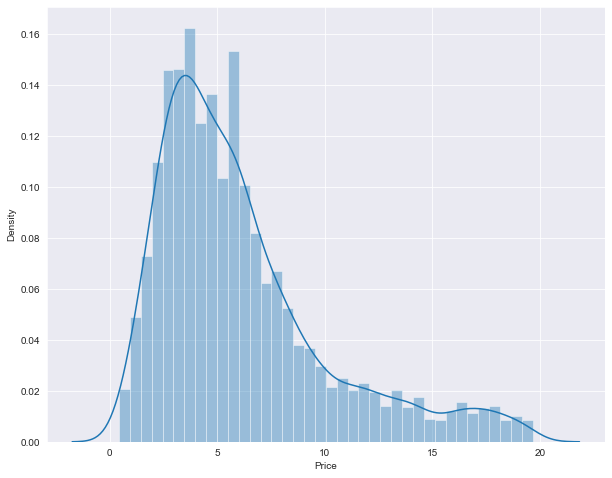

In [39]:
# We can check the PDF once again to ensure that the result is still distributed in the same way overall
# however, there are much fewer outliers

sns.set_style('darkgrid')
plt.figure(figsize=(10,8))
sns.distplot(df['Price'])
plt.ticklabel_format(style='plain', axis='x')
plt.show()

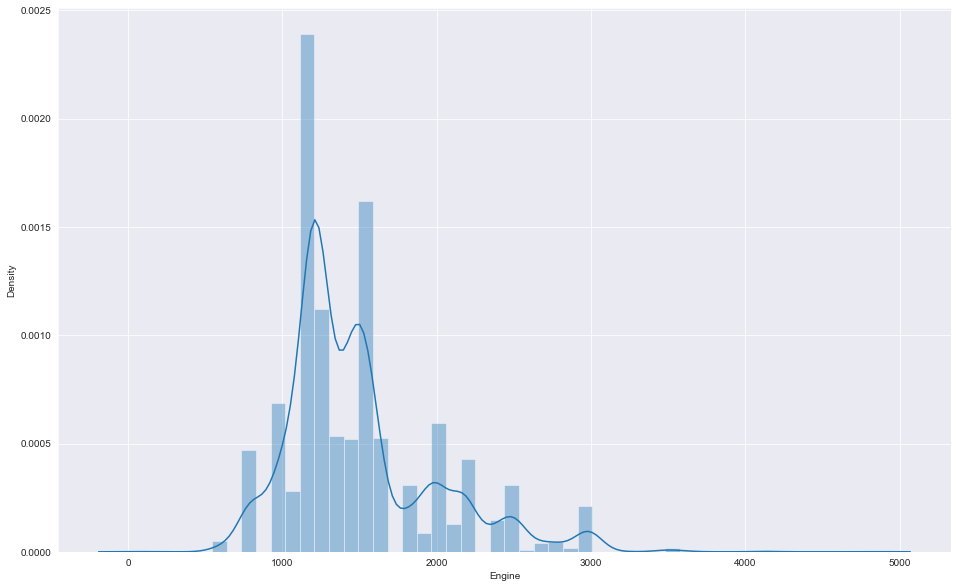

In [40]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,10))
sns.distplot(df['Engine'])
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [41]:
q1 = df['Engine'].quantile(0.25)
q3 = df['Engine'].quantile(0.75)
iqr = q3-q1

UL = q3 + (1.5 * iqr) # Upper Limit
LL = q1 - (1.5 * iqr ) # Lower Limit

print("IQR :", iqr)
print("UL :", UL)
print("LL :", LL)

IQR : 401.0
UL : 2199.5
LL : 595.5


In [42]:
df[df['Engine']>UL].count()['Engine']

396

In [43]:
# These 396 values are greater then upper limit value 2199.5

# outlier removal from Engine

engine = df[df['Engine']<UL]
df = engine
df

,Location,Year,Driven,Fuel,Transmission,Owner,Mileage,Engine,Power,Seats,Price,Brand
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...
6013,Coimbatore,2015,70602,Diesel,Manual,First,25.80,1498.0,98.60,5.0,4.83,Honda
6014,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,Maruti
6015,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,Hyundai
6017,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,Maruti


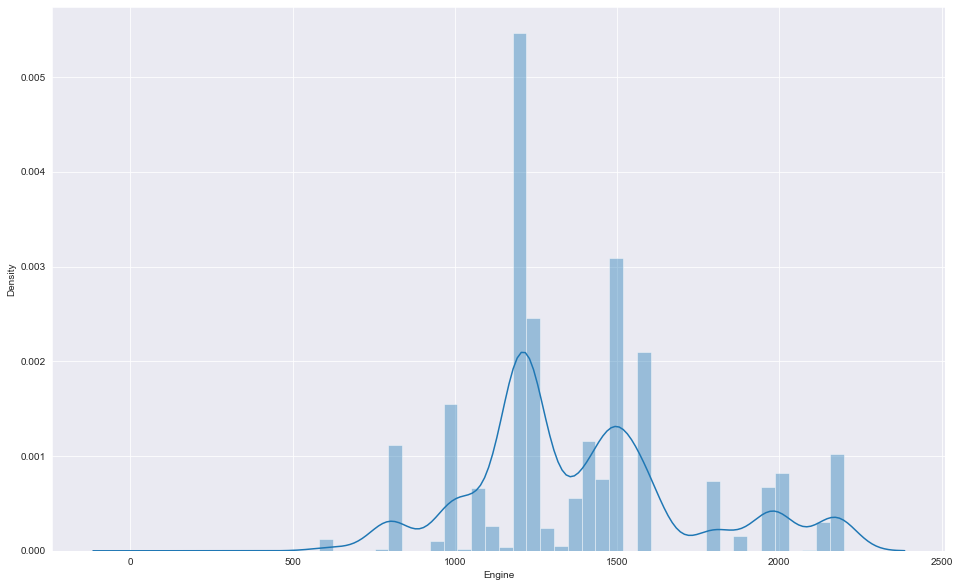

In [44]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,10))
sns.distplot(df['Engine'])
plt.ticklabel_format(style='plain', axis='x')
plt.show()

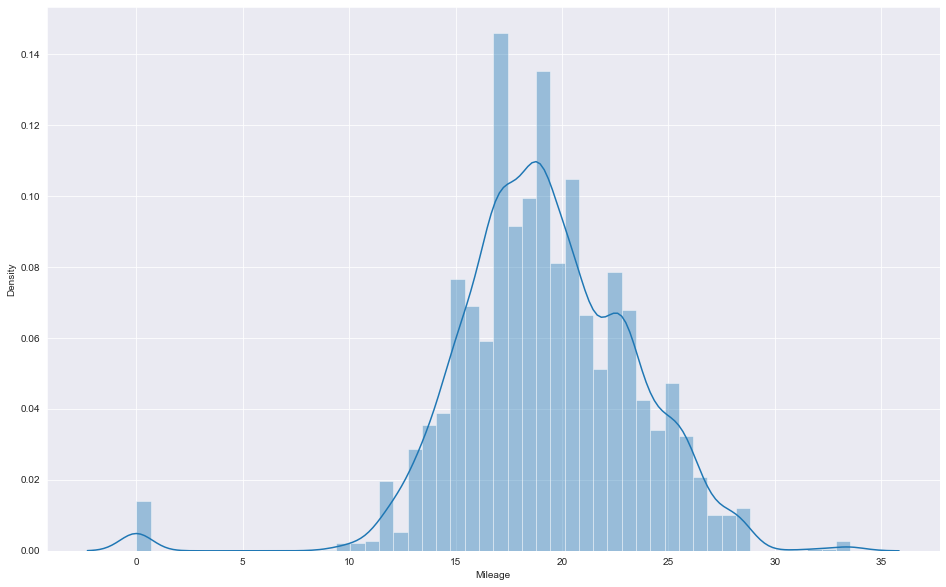

In [45]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,10))
sns.distplot(df['Mileage'])
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [46]:
q1= df['Mileage'].quantile(0.25)
q3 = df['Mileage'].quantile(0.75)

iqr = q3-q1

UL = q3 + (1.5 * iqr)
LL = q1 - (1.5 * iqr)

print("IQR :", iqr)
print("UL :", UL)
print("LL :", LL)

IQR : 5.27
UL : 29.975
LL : 8.895000000000001


In [47]:
df[df['Mileage']>UL].count()['Mileage']

14

In [48]:
# These 14 values are greater then upper limit value 29.975

# outlier removal from Engine

mileage = df[df['Mileage']<UL]
df = mileage
df

,Location,Year,Driven,Fuel,Transmission,Owner,Mileage,Engine,Power,Seats,Price,Brand
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...
6013,Coimbatore,2015,70602,Diesel,Manual,First,25.80,1498.0,98.60,5.0,4.83,Honda
6014,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,Maruti
6015,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,Hyundai
6017,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,Maruti


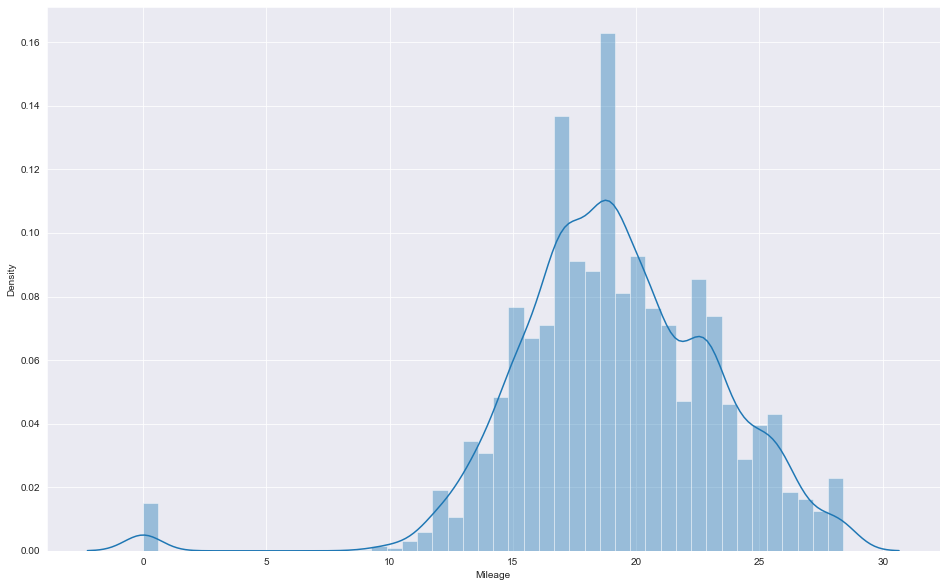

In [49]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,10))
sns.distplot(df['Mileage'])
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [50]:
df[df['Mileage']<LL].count()['Mileage']

44

In [51]:
# These 44 values are less then the lower limit value 8.895

# outlier removal from Engine
mileage_lower = df[df['Mileage']>LL]
df = mileage_lower
df

,Location,Year,Driven,Fuel,Transmission,Owner,Mileage,Engine,Power,Seats,Price,Brand
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...
6013,Coimbatore,2015,70602,Diesel,Manual,First,25.80,1498.0,98.60,5.0,4.83,Honda
6014,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,Maruti
6015,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,Hyundai
6017,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,Maruti


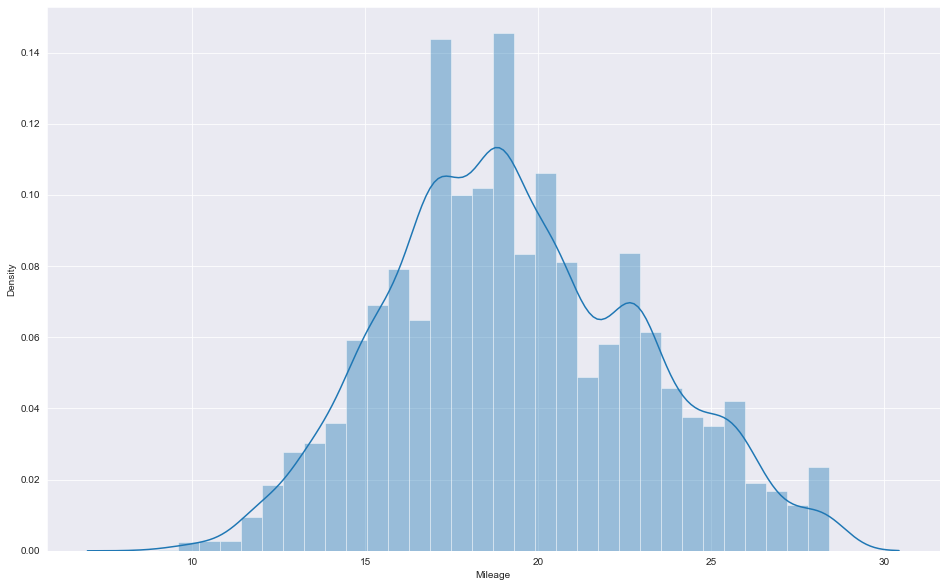

In [52]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,10))
sns.distplot(df['Mileage'])
plt.ticklabel_format(style='plain', axis='x')
plt.show()

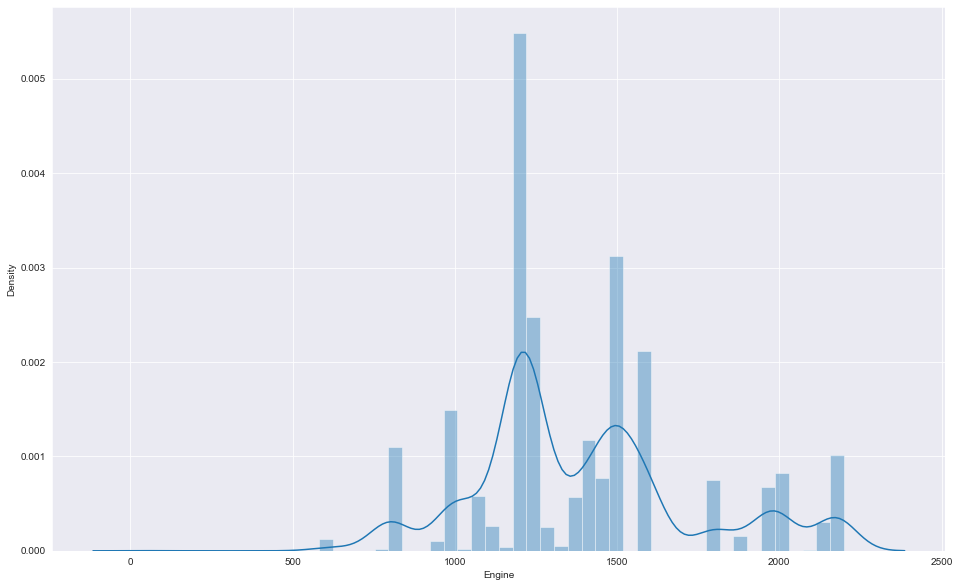

In [53]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,10))
sns.distplot(df['Engine'])
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [54]:
q1 = df['Engine'].quantile(0.25)
q3 = df['Engine'].quantile(0.75)

iqr = q3-q1

UL = q3 + (1.5 * iqr)
LL = q1 - (1.5 * iqr)

print("IQR :", iqr)
print("UL :", UL)
print("LL :", LL)

IQR : 302.0
UL : 1952.0
LL : 744.0


In [55]:
df[df['Engine']< LL].count()['Engine']

26

In [56]:
# These 26 values are less than the Lower limit we would remove these values

# outlier removal from Kms_Driven
engine = df[df['Engine']>LL]
df = engine
df

,Location,Year,Driven,Fuel,Transmission,Owner,Mileage,Engine,Power,Seats,Price,Brand
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...
6013,Coimbatore,2015,70602,Diesel,Manual,First,25.80,1498.0,98.60,5.0,4.83,Honda
6014,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,Maruti
6015,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,Hyundai
6017,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,Maruti


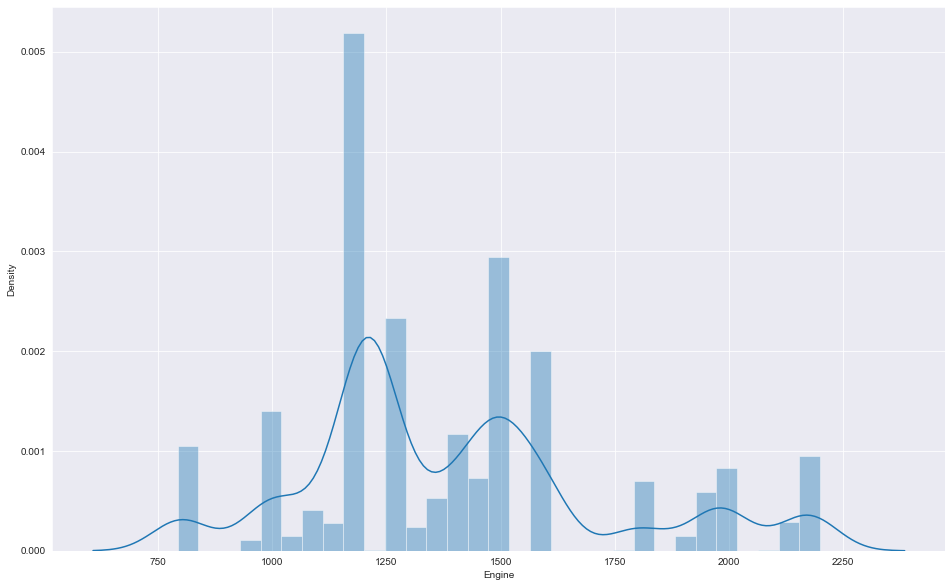

In [57]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,10))
sns.distplot(df['Engine'])
plt.ticklabel_format(style='plain', axis='x')
plt.show()

## Analysis with respect to the numbers of cars

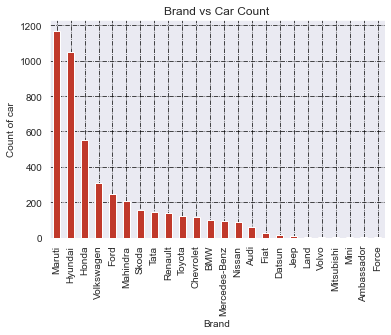

In [58]:
## Brand vs Car count

plt.xlabel("Brand")
plt.ylabel("Count of car")

df["Brand"].value_counts().plot(kind="bar", title="Brand vs Car Count", color="#C0392B")
plt.grid(color="black", linestyle='-.',linewidth=0.7)
plt.show()

People buy Maruti and Hyundai cars more than other brands.

### Year vs Car count

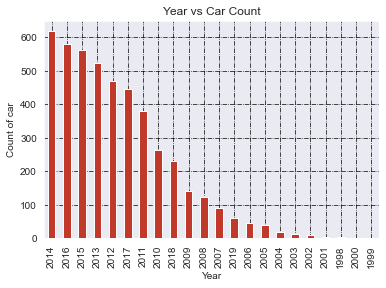

In [59]:
plt.xlabel("Year")
plt.ylabel("Count of car")

df["Year"].value_counts().plot(kind="bar", title="Year vs Car Count", color="#C0392B")
plt.grid(color="black", linestyle='-.',linewidth=0.7)
plt.show()

Maximum no of cars in the data frame is between 2010 to 2017

### Analysis of other features with respect to car count

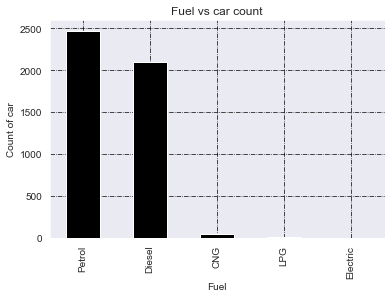

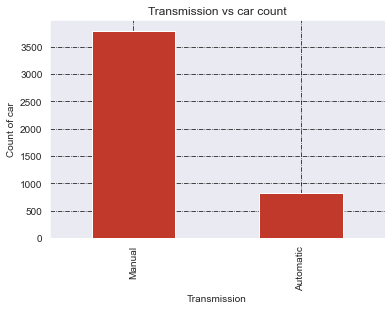

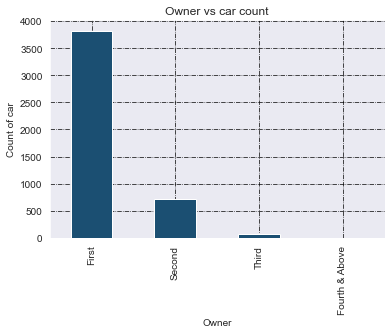

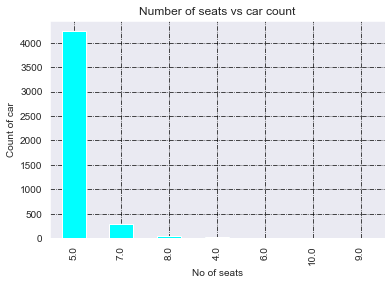

In [60]:
#fuel-type
plt.xlabel("Fuel")
plt.ylabel("Count of car")
df['Fuel'].value_counts().plot(kind='bar',title='Fuel vs car count',color='black')
plt.grid(color="black", linestyle='-.',linewidth=0.7)
plt.show()


#Transmission
plt.xlabel("Transmission")
plt.ylabel("Count of car")
df['Transmission'].value_counts().plot(kind='bar',title='Transmission vs car count',color='#C0392B')
plt.grid(color="black", linestyle='-.',linewidth=0.7)
plt.show()

#owner type
plt.xlabel("Owner")
plt.ylabel("Count of car")
df['Owner'].value_counts().plot(kind='bar',title='Owner vs car count',color='#1B4F72')
plt.grid(color="black", linestyle='-.',linewidth=0.7)
plt.show()

#seats
plt.xlabel("No of seats")
plt.ylabel("Count of car")
df['Seats'].value_counts().plot(kind='bar',title='Number of seats vs car count',color='cyan')
plt.grid(color="black", linestyle='-.',linewidth=0.7)
plt.show()


### Conclusion of the above features:
    
1. Maximum cars are of petrol and diesel type.
2. Manual cars are more than Automatic cars.
3. First-hand cars are maximum followed by second.
4. Cars with 5 seats are dominant.

## Analysis with respect to Price

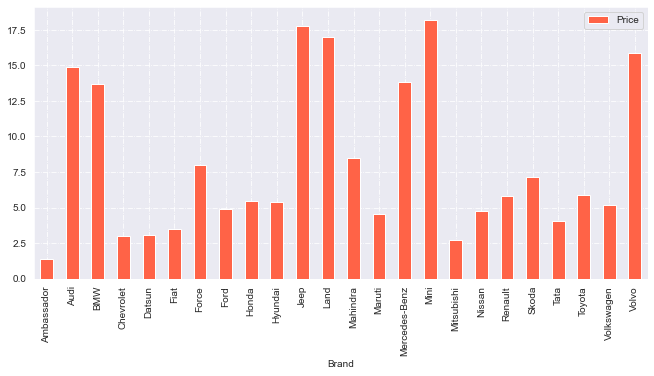

In [61]:
BrandvsPrice = pd.DataFrame(df.groupby("Brand")["Price"].mean())
BrandvsPrice.plot.bar(color='tomato', figsize=(11,5))
plt.grid(linestyle="-.")
plt.show()

Mini is the most expensive car in the data set

### Analysis of otherfeatures with respect to Price 

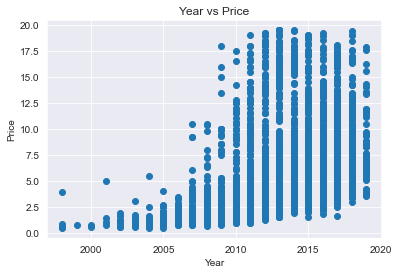

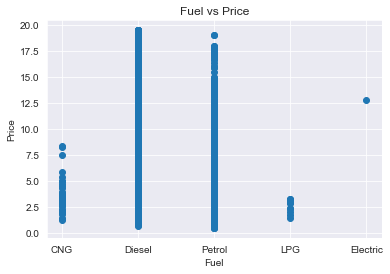

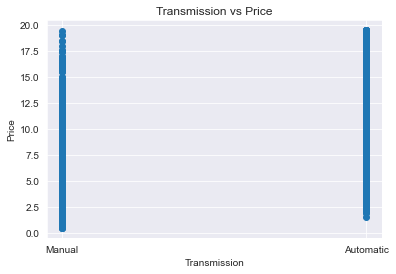

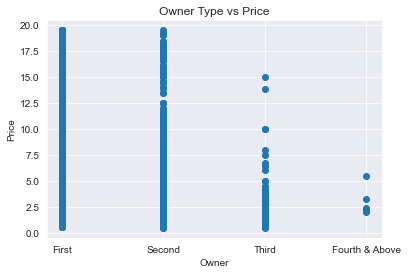

In [62]:
# Year vs Price
plt.title("Year vs Price")
plt.xlabel("Year")
plt.ylabel("Price")
plt.scatter(df.Year,df.Price)
plt.show()

# Fuel type vs price
plt.title("Fuel vs Price")
plt.xlabel("Fuel")
plt.ylabel("Price")
plt.scatter(df.Fuel,df.Price)
plt.show()

#transmission vs price
plt.title("Transmission vs Price")
plt.xlabel("Transmission")
plt.ylabel("Price")
plt.scatter(df.Transmission,df.Price)
plt.show()

#owner type vs price
plt.title("Owner Type vs Price")
plt.xlabel("Owner")
plt.ylabel("Price")
plt.scatter(df.Owner,df.Price)
plt.show()

### Conclusion of the above features

1. Cars ranging between the years 2012 to 2020 cost more.
2. Petrol and diesel cars are costly.
3. Automatic cars cost more than manual cars.
4. First-hand cars are costly followed by second-hand.

### Removing outlier
The relation between price and km drove.

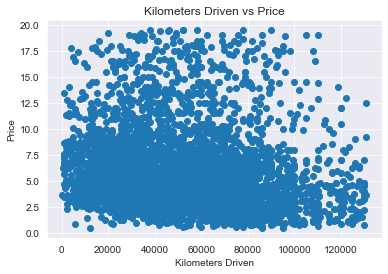

<Figure size 1440x1296 with 0 Axes>

In [63]:
plt.title("Kilometers Driven vs Price")
plt.xlabel("Kilometers Driven")
plt.ylabel("Price")
plt.scatter(df.Driven, df.Price)
plt.figure(figsize=(20, 18))
plt.show()

### The relation of Mileage and Seats with Price

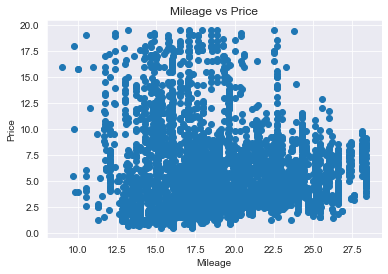

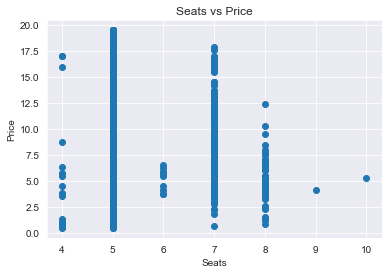

In [64]:
#mileage vs price
plt.title("Mileage vs Price")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.scatter(df.Mileage,df.Price)
plt.show()

#Seats vs price
plt.title("Seats vs Price")
plt.xlabel("Seats")
plt.ylabel("Price")
plt.scatter(df.Seats,df.Price)
plt.show()

### Handling categorical Columns

In [65]:
### creating a new dataframe

data = df.copy()

In [66]:
### Fuel, Transmission, Owner and Brand are categorical columns

le_Fuel = LabelEncoder()
le_Transmission = LabelEncoder()
le_Owner = LabelEncoder()
le_Brand = LabelEncoder()
le_Location = LabelEncoder()

data['Fuel_Type'] = le_Fuel.fit_transform(df['Fuel'])
data['Transmission_Type'] = le_Transmission.fit_transform(df['Transmission'])
data['Owner_Type'] = le_Owner.fit_transform(df["Owner"])
data['Brand_Type'] = le_Brand.fit_transform(df["Brand"])
data["Location_Type"] = le_Location.fit_transform(df["Location"])

In [67]:
data.head(2)

,Location,Year,Driven,Fuel,Transmission,Owner,Mileage,Engine,Power,Seats,Price,Brand,Fuel_Type,Transmission_Type,Owner_Type,Brand_Type,Location_Type
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,0,1,0,13,9
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,1,1,0,9,10


In [68]:
### shuffling the columns as per our need

data=data[['Brand_Type','Year','Driven','Fuel_Type','Transmission_Type','Owner_Type','Mileage','Engine','Power','Seats','Location','Location_Type','Transmission', 'Fuel','Owner','Brand', 'Price']]
data.head()

,Brand_Type,Year,Driven,Fuel_Type,Transmission_Type,Owner_Type,Mileage,Engine,Power,Seats,Location,Location_Type,Transmission,Fuel,Owner,Brand,Price
0,13,2010,72000,0,1,0,26.60,998.0,58.16,5.0,Mumbai,9,Manual,CNG,First,Maruti,1.75
1,9,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,Pune,10,Manual,Diesel,First,Hyundai,12.50
2,8,2011,46000,4,1,0,18.20,1199.0,88.70,5.0,Chennai,2,Manual,Petrol,First,Honda,4.50
3,13,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,Chennai,2,Manual,Diesel,First,Maruti,6.00
4,1,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,Coimbatore,3,Automatic,Diesel,Second,Audi,17.74


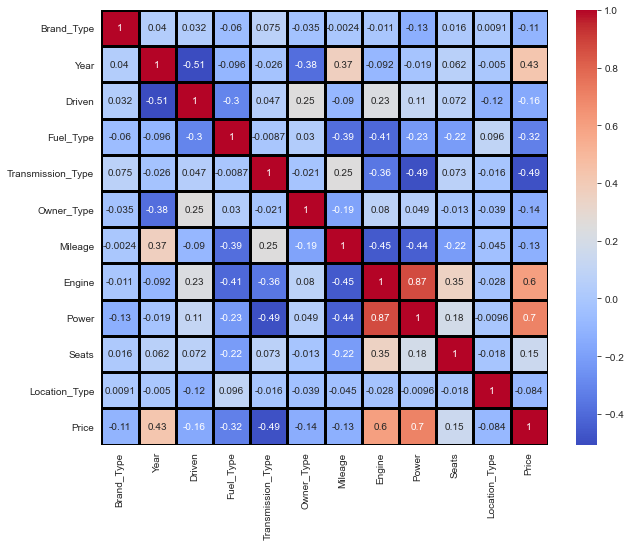

In [69]:
### Correlation Matrix

correlationMatrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm', linewidths=3, linecolor='black')
plt.show()

In [70]:
df_input = data[['Brand_Type','Year','Driven','Mileage','Engine','Power','Seats','Fuel_Type','Transmission_Type','Owner_Type','Location_Type']]
df_target = data['Price']

In [71]:
X = df_input.iloc[:,:].values
y = df_input.iloc[:].values

### Most Important Features 

Finding features which are most importand and which are least important
for predicting the price of pre-owned car

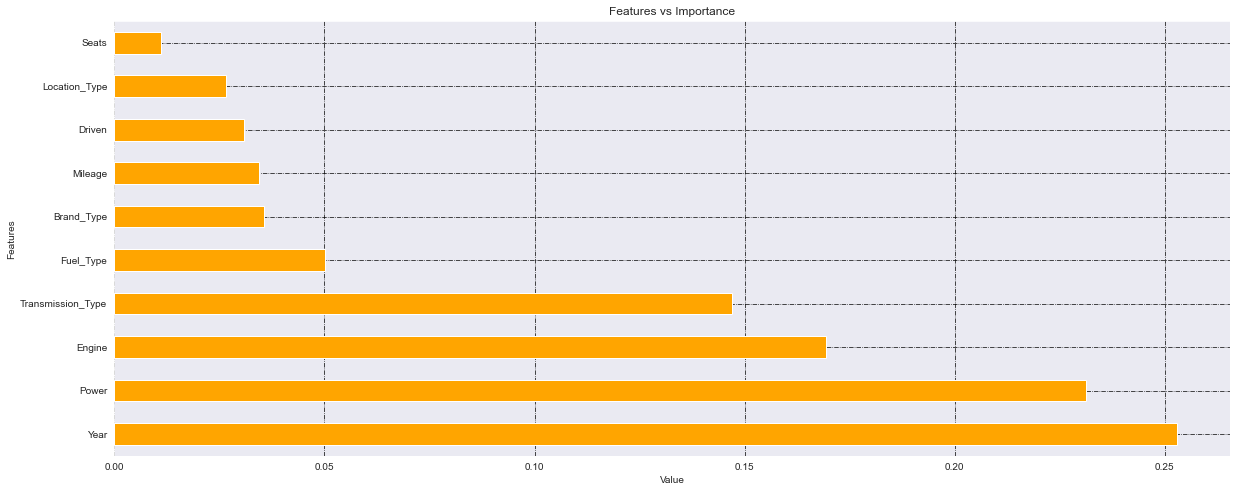

In [72]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(df_input, df_target)

feature_importance = pd.Series(model.feature_importances_, index=df_input.columns)

plt.figure(figsize=(20, 8))
plt.xlabel("Value")
plt.ylabel("Features")
plt.title("Features vs Importance")
plt.grid()

feature_importance.nlargest(10).plot(kind='barh', color='orange')
plt.grid(color='black', linestyle='-.', linewidth=0.7)
plt.show()

Transmission_Type is most important and Location_Type is least important feature

### Applying different models on the data

In [73]:
from sklearn.tree import DecisionTreeRegressor

In [74]:
## using GridSearch

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [75]:
def find_best_model_using_gridsearchcv(training_data, target_data):
    algos = {
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params': {
                'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                'splitter' :['best', 'random'],
                'max_depth' :[4,6,8,10,12,14,16,20],
                'min_samples_split' :[2,3,4,5,6],
                'min_samples_leaf' :[1,2,3,4]
                    }}}
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config  in algos.items():
        
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(training_data, target_data)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_,
            'best_estimataors': gs.best_estimator_
            })
        
    return pd.DataFrame(scores,columns=['model','best_params','best_score'])
    

In [76]:
# result= find_best_model_using_gridsearchcv(df_input, df_target)
result= find_best_model_using_gridsearchcv(X, y)

In [77]:
result["best_params"][0]

{'criterion': 'poisson',
 'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'splitter': 'random'}

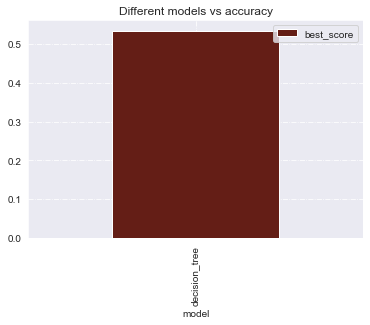

In [78]:
## showing model accuracy
result_map=result.drop(['best_params'],axis='columns')
result_map.plot(x="model",y='best_score',kind='bar',color='#641E16',title='Different models vs accuracy')
plt.grid(linestyle='-.')
plt.show()

In [79]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(df_input, df_target, test_size=0.2, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [80]:
len(X_train)

3698

In [81]:
len(X_test)

925

In [84]:
model = DecisionTreeRegressor(criterion='poisson', 
                              splitter='random', 
                              max_depth= 20, 
                              min_samples_leaf = 1, 
                              min_samples_split = 4,)
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=20, min_samples_split=4,
                      splitter='random')

In [85]:
model.score(X_test, y_test)

0.5605606198419774

In [86]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [87]:
print(f'Train Score : {model.score(y_train_pred, y_train)}')
print(f'Test Score : {model.score(y_test_pred, X_test)}')

Train Score : 0.6619630858197275
Test Score : 0.5605606198419774


### Improving the decision tree using  Cost-Complexity Pruning (ccp_alpha) 

## Post Pruning

In [88]:
path = model.cost_complexity_pruning_path(X_train, y_train)

In [89]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [90]:
print('ccp_alphas :', ccp_alphas.reshape(-1,1))

ccp_alphas : [[0.00000000e+00]
 [7.77973796e-05]
 [9.50777432e-05]
 [1.19957872e-04]
 [1.44265723e-04]
 [1.55895869e-04]
 [1.75511844e-04]
 [1.94818649e-04]
 [1.97596261e-04]
 [2.00177380e-04]
 [2.04364694e-04]
 [2.13862211e-04]
 [2.37361539e-04]
 [2.67959406e-04]
 [2.71483559e-04]
 [2.80835611e-04]
 [3.09674763e-04]
 [3.10600235e-04]
 [3.64538891e-04]
 [3.69115059e-04]
 [4.05551978e-04]
 [4.19769432e-04]
 [4.55833064e-04]
 [4.82361077e-04]
 [4.97833231e-04]
 [5.29742108e-04]
 [6.34156183e-04]
 [7.39057487e-04]
 [7.79288009e-04]
 [8.21178904e-04]
 [8.31320683e-04]
 [8.49755536e-04]
 [9.10531247e-04]
 [9.51950991e-04]
 [1.07975909e-03]
 [1.29954218e-03]
 [1.31205767e-03]
 [1.35967255e-03]
 [1.45239639e-03]
 [1.46354351e-03]
 [1.56239018e-03]
 [1.63482783e-03]
 [1.66889197e-03]
 [2.01516826e-03]
 [2.06673096e-03]
 [2.11767495e-03]
 [2.20567677e-03]
 [2.51952892e-03]
 [2.68554746e-03]
 [2.72982363e-03]
 [2.84628011e-03]
 [2.86501992e-03]
 [2.95254968e-03]
 [2.95703624e-03]
 [2.96413646e-0

In [91]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Plotting the Accuracy vs alpha graph, to know the value of alpha for which we 
we will get maxium training accuracy


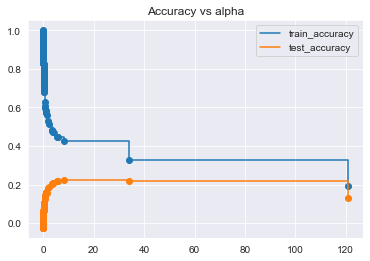

In [92]:
train_acc = []
test_acc = []

for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(c.score(y_train_pred, y_train))
    test_acc.append(c.score(y_test_pred, y_test))

plt.scatter(ccp_alphas, train_acc)
plt.scatter(ccp_alphas, test_acc)
plt.plot(ccp_alphas, train_acc, label='train_accuracy', drawstyle="steps-post")
plt.plot(ccp_alphas, test_acc, label='test_accuracy', drawstyle="steps-post")
plt.legend()
plt.title("Accuracy vs alpha")
plt.show()
                     

In [93]:
model = DecisionTreeRegressor(
                             ccp_alpha=0.18,
                             random_state=0)
model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.18, random_state=0)

In [94]:
model.score(X_test, y_test)

0.09557694095408031

In [95]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [96]:
print(f'Train Score : {model.score(y_train_pred, y_train)}')
print(f'Test Score : {model.score(y_test_pred, X_test)}')

Train Score : 0.715965616696599
Test Score : 0.09557694095408031


### with post pruning using ccp_alpha the test_score increased